In [ ]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Caricare i dati in un dataframe.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv')
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Visualizzare i dati.

In [ ]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Eliminare dal dataframe tutti i record con valori NaN.

In [ ]:
df.dropna(inplace = True)
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,Japanese,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


4. Calcolare il numero di show per ogni lingua. Ordinare in ordine decrescente sul numero.

In [ ]:
df['Language'].value_counts()

English     155
Hindi        17
Japanese      7
Spanish       1
Suomi         1
Deutsch       1
Name: Language, dtype: int64

In [ ]:
# df.groupby('Language').count()[['Name of the show']].rename(columns = {"Name of the show": "totale"})

5. Visualizzare il grafico a barre verticali dei dati precedenti.

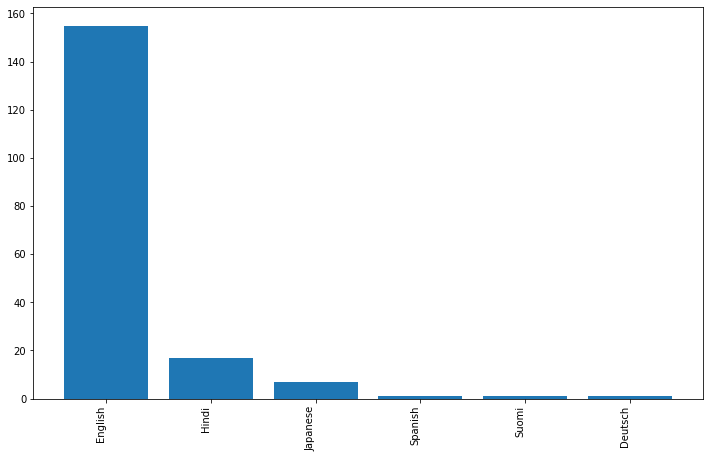

In [ ]:
df1 = df['Language'].value_counts()
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.autofmt_xdate(rotation = 90)
ax.bar(df1.index, df1)
plt.show()

6. Visualizzare le stesse informazioni dell'esercizio precedente utilizzando un grafico a torta.

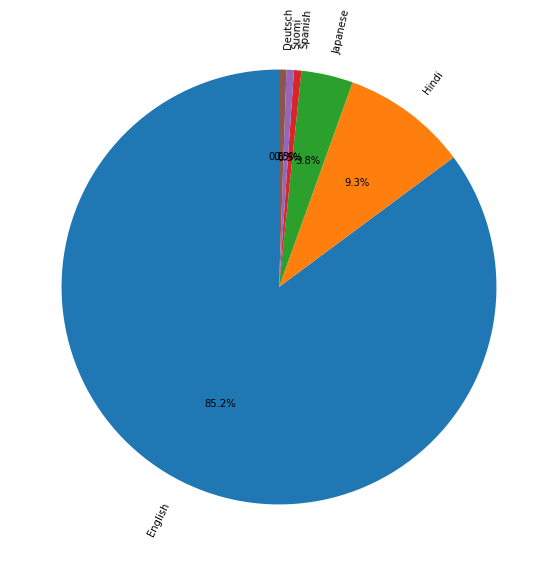

In [ ]:
df2 = df['Language'].value_counts()
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(df2, labels = df2.index, autopct = '%1.1f%%', startangle = 90, rotatelabels = True, textprops = {'fontsize': 10})
plt.show()

7. Creare un nuovo dataframe che nella colonna 'Language' contenga solo 'English' o 'non English'.

In [ ]:
df3 = df.copy()
df3['Language'][df3['Language'] != 'English'] = 'non English'
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,non English,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,non English,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,non English,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,non English,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


8. Visualizzare un grafico a barre con gli anni sulle ascisse e il numero di show in inglese e non in inglese sulle ordinate. Considerare solo gli ultimi 10 anni (vedi grafico allegato come esempio).

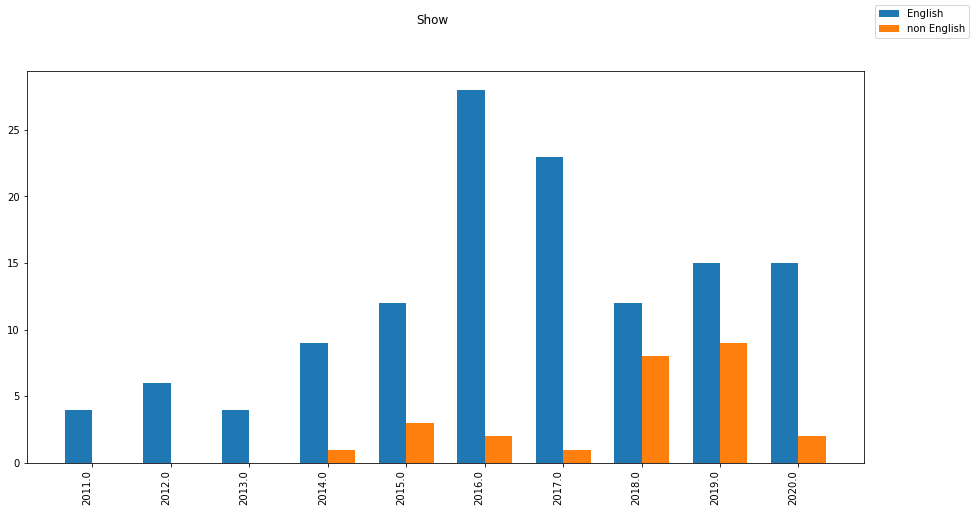

In [ ]:
df4 = df3.groupby(['Year of release','Language']).count()['S.no.'].unstack().reset_index().tail(10)
labels = df4['Year of release']
eng = df4.English
non_eng = df4['non English']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, eng, width, label = 'English')
rects2 = ax.bar(x + width/2, non_eng, width, label = 'non English')

fig.autofmt_xdate(rotation = 90)                             # Ruota i nomi dei valori sulle ascisse di 45 gradi
fig.suptitle('Show')    # Imposta il titolo del grafico
fig.legend(loc = 1)                                          # Crea la legenda e la posiziona nel I quadrante

ax.set_xticks(x)              # Seleziona ogni quanto visualizzare un nome sulle ascisse
ax.set_xticklabels(labels) 
plt.show()